# **Exploratory Data Analysis**

Import Packages

In [45]:
import pandas as pd
pd.set_option('display.width', 1000)

import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import nasdaqdatalink

# Machine Learning Models
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, StackingRegressor, BaggingRegressor
)
import xgboost as xgb
from xgboost import XGBRegressor

import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


#--- Starting Here ---#

In [2]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
NVDA = 'NVDA'
SEMICONDUCTORS = ["TSM", "AVGO", "AMD", "ASML", "MRVL", "ON", "NVDA"]
scaler = MinMaxScaler(feature_range=(0, 1)) # Scaling RSI values for more relatable trends

semiConductor_data = yf.download(NVDA, start='2010-01-01', end='2024-01-01')
semiConductor_data.columns = [col[0] for col in semiConductor_data.columns]
semiConductor_data['Ticker'] = NVDA
semiConductor_data['RSI'] = calculate_rsi(semiConductor_data['Close'], window=14)
semiConductor_data['RSI_Scaled'] = scaler.fit_transform(semiConductor_data['RSI'].values.reshape(-1, 1))
semiConductor_data.reset_index(inplace=True)
semiConductor_data = semiConductor_data[['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'RSI', 'RSI_Scaled']]
                                                            
#print(f"Total Data Length: {len(semiConductor_data)}")

for stock in SEMICONDUCTORS:
    stock_data = yf.download(stock, start="2010-01-01", end="2024-01-01")
                                                                                                            
    stock_data['Ticker'] = stock
    stock_data['RSI'] = calculate_rsi(stock_data['Close'], window=14)

    stock_data['RSI_Scaled'] = scaler.fit_transform(stock_data['RSI'].values.reshape(-1, 1))
    stock_data['Close_Scaled'] = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))
    stock_data['High_Scaled'] = scaler.fit_transform(stock_data['High'].values.reshape(-1, 1))
    stock_data['Low_Scaled'] = scaler.fit_transform(stock_data['Low'].values.reshape(-1, 1))
    stock_data['Open_Scaled'] = scaler.fit_transform(stock_data['Open'].values.reshape(-1, 1))
    stock_data['Volume_Scaled'] = scaler.fit_transform(stock_data['Volume'].values.reshape(-1, 1))
    
    stock_data.reset_index(inplace=True)
    #stock_data = stock_data[['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'RSI', 'RSI_Scaled']]
    stock_data.columns = [col[0] for col in stock_data.columns]

    semiConductor_data = pd.concat([semiConductor_data, stock_data], ignore_index=True)

    #print([val[0] for val in semiConductor_data.columns.tolist()])
    #print(f"Total Data Length: {len(semiConductor_data)}")

semiConductor_data = semiConductor_data.dropna()
semiConductor_data.to_csv("semiconductorData.csv", index=False)
print([ i for i in semiConductor_data['Ticker'].unique()])
for stock in SEMICONDUCTORS:
    print(f"{stock} rows: {len(semiConductor_data.loc[semiConductor_data['Ticker'] == stock])}")

print(semiConductor_data.columns)
semiConductor_data.drop(columns=['Date', 'RSI', 'Close', 'High', 'Low', 'Open', 'Volume'], inplace=True)
print(semiConductor_data.dtypes)
semiConductor_data['Ticker'], conversion = pd.factorize(semiConductor_data['Ticker'])
print(f"Conversion: {conversion}")
semiConductor_data.head(5)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


['TSM', 'AVGO', 'AMD', 'ASML', 'MRVL', 'ON', 'NVDA']
TSM rows: 3509
AVGO rows: 3509
AMD rows: 3509
ASML rows: 3509
MRVL rows: 3509
ON rows: 3509
NVDA rows: 3509
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'RSI', 'RSI_Scaled', 'Close_Scaled', 'High_Scaled', 'Low_Scaled', 'Open_Scaled', 'Volume_Scaled'], dtype='object')
Ticker            object
RSI_Scaled       float64
Close_Scaled     float64
High_Scaled      float64
Low_Scaled       float64
Open_Scaled      float64
Volume_Scaled    float64
dtype: object


,Ticker,RSI_Scaled,Close_Scaled,High_Scaled,Low_Scaled,Open_Scaled,Volume_Scaled
3535,0,0.173047,0.003295,0.004936,0.003994,0.005091,0.329174
3536,0,0.191427,0.003595,0.004162,0.003994,0.002995,0.322241
3537,0,0.181910,0.002846,0.003145,0.003286,0.003344,0.344281
3538,0,0.184696,0.002796,0.002952,0.003235,0.002695,0.361998
3539,0,0.244672,0.003096,0.003242,0.002983,0.003444,0.653475


In [65]:
class lstmDataset(Dataset):
    def __init__(self, data, features, targets, input_window=30, output_window=5):
        self.data = torch.FloatTensor(data.values)
        self.input_window = input_window
        self.output_window = output_window
    def __len__(self):
        return len(self.data) - self.input_window - self.output_window + 1

    def __getitem__(self, idx):
        x = self.data[idx : idx + self.input_window]
        y = self.data[idx + self.input_window : idx + self.input_window + self.output_window, 1]  # Assuming column 6 is the target
        return x, y

In [83]:
features = ["Close", "High", "Low", "Open", "Volume"]
targets = ["RSI_Scaled"]

company_datasets = {}
tickers = semiConductor_data['Ticker'].unique()

# Create an lstmDataset for each company and store it in company_datasets
for ticker in tickers:
    data = semiConductor_data[semiConductor_data['Ticker'] == ticker]
    company_datasets[ticker] = lstmDataset(data, input_window=30, output_window=5, features=features, targets=targets)
#print(company_datasets)

batch_size = 32 

train_split = 0.7
val_split = 0.15
test_split = 0.15

# Create DataLoaders for training, validation, and testing
train_loaders = {}
val_loaders = {}
test_loaders = {}

for ticker, dataset in company_datasets.items():
    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = dataset_size - train_size - val_size  # Remaining samples for testing

    # Perform the split
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )

    train_loaders[ticker] = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loaders[ticker] = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loaders[ticker] = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

example_ticker = tickers[0]
print(f"Ticker: {example_ticker}")
print(f"Train Loader Size: {len(train_loaders[example_ticker])}")
print(f"Validation Loader Size: {len(val_loaders[example_ticker])}")
print(f"Test Loader Size: {len(test_loaders[example_ticker])}")

Ticker: 0
Train Loader Size: 76
Validation Loader Size: 17
Test Loader Size: 17


Define LSTM Model

In [84]:
class LSTMRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LSTMRegressionModel, self).__init__()
        
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size=input_size, 
                             hidden_size=64, 
                             batch_first=True, 
                             dropout=0)
        
        self.lstm2 = nn.LSTM(input_size=64, 
                             hidden_size=128, 
                             batch_first=True, 
                             dropout=0.2)

        self.lstm3 = nn.LSTM(input_size=128,
                             hidden_size=128,
                             batch_first=True,
                             dropout=0.2)
        
        self.lstm4 = nn.LSTM(input_size=128, 
                             hidden_size=64, 
                             batch_first=True, 
                             dropout=0.1)
        
        # Fully connected layers
        self.dense1 = nn.Linear(64, 128)
        self.dense2 = nn.Linear(128, 64)
        self.dense3 = nn.Linear(64, output_size)
        
        # Activation functions and dropout
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.15)
        
    def forward(self, x):
        # LSTM layers
        out, _ = self.lstm1(x)
        #out = self.sigmoid(out)

        out, _ = self.lstm2(out)
        #out = self.sigmoid(out)

        out , _ = self.lstm3(out)
        #out = self.sigmoid(out)

        out, (hn, _) = self.lstm4(out)  # Use the hidden state from the last LSTM
        #out = self.sigmoid(out)
        
        # Fully connected layers
        out = hn[-1]  # Final hidden state from the last LSTM layer
        out = self.dense1(out)
        out = self.relu(out)
        out = self.dropout1(out)

        out = self.dense2(out)
        out = self.relu(out)
        out = self.dropout1(out)

        out = self.dense3(out)  # Linear output for regression
        out = self.sigmoid(out)
        return out

In [ ]:
epochs = 20
model = LSTMRegressionModel(input_size=7, output_size=5).to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.HuberLoss()

losses = []  
i = 0

for ticker, loader in train_loaders.items(): 
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.8, patience=25, verbose=True)
    for epoch in range(epochs):
        model.train()
        for batch_idx, (x_batch, y_batch) in enumerate(loader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
                
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print(f"Company: {ticker}, Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss.item()}")

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_inputs, val_targets in val_loaders[ticker]:
                val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_targets).item()
        val_loss /= len(val_loaders[ticker]) 
        
        scheduler.step(val_loss)

plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


c:\Users\lordw\OneDrive\Documents\Coding_Projects\AlgoTrAdInG\venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
c:\Users\lordw\OneDrive\Documents\Coding_Projects\AlgoTrAdInG\venv\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
c:\Users\lordw\OneDrive\Documents\Coding_Projects\AlgoTrAdInG\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Company: 0, Epoch: 0, Batch: 0, Loss: 0.014120030216872692
Company: 0, Epoch: 1, Batch: 0, Loss: 0.011345971375703812
Company: 0, Epoch: 2, Batch: 0, Loss: 0.007142925169318914
Company: 0, Epoch: 3, Batch: 0, Loss: 0.00864482019096613
Company: 0, Epoch: 4, Batch: 0, Loss: 0.00889009889215231
Company: 0, Epoch: 5, Batch: 0, Loss: 0.008492023684084415
Company: 0, Epoch: 6, Batch: 0, Loss: 0.00880043487995863
Company: 0, Epoch: 7, Batch: 0, Loss: 0.008740373887121677
Company: 0, Epoch: 8, Batch: 0, Loss: 0.008444637060165405
Company: 0, Epoch: 9, Batch: 0, Loss: 0.008681314997375011
Company: 0, Epoch: 10, Batch: 0, Loss: 0.007777910679578781
Company: 0, Epoch: 11, Batch: 0, Loss: 0.007782806642353535
Company: 0, Epoch: 12, Batch: 0, Loss: 0.009082905948162079
Company: 0, Epoch: 13, Batch: 0, Loss: 0.007783736567944288
Company: 0, Epoch: 14, Batch: 0, Loss: 0.007294557988643646
Company: 0, Epoch: 15, Batch: 0, Loss: 0.008240791037678719
Company: 0, Epoch: 16, Batch: 0, Loss: 0.008020761422

Average Test Loss: 0.031220489674631285
[0, 1, 2, 3, 4]
(32, 5)
(32, 5)
Predictions for 0: [0.47008106 0.4616083  0.46647486 0.4808041  0.4918485 ]
True values for 0: [0.36242574 0.4926376  0.5527757  0.46369106 0.46571058]


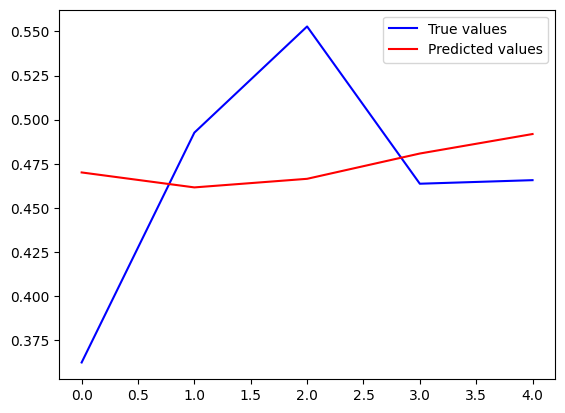

(32, 5)
(32, 5)
Predictions for 0: [0.73532903 0.7305802  0.7082391  0.67471325 0.6193073 ]
True values for 0: [0.3577991  0.4560116  0.35165435 0.35165367 0.26346457]


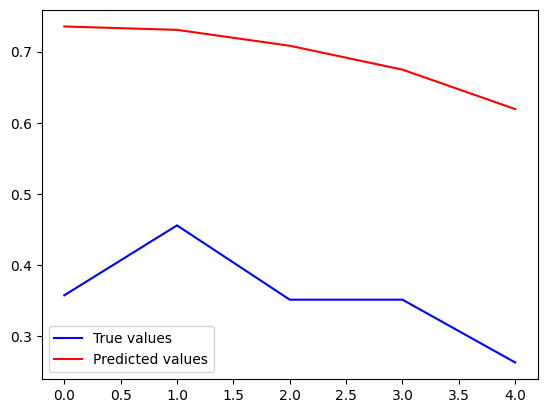

(32, 5)
(32, 5)
Predictions for 0: [0.7197647  0.67370427 0.6468608  0.6673825  0.70143014]
True values for 0: [0.6519711  0.596469   0.6042116  0.72116965 0.724845  ]


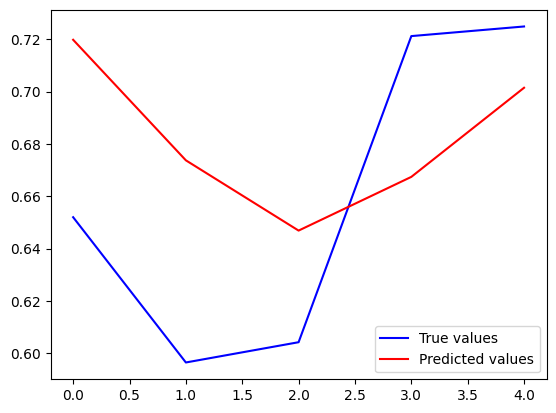

(32, 5)
(32, 5)
Predictions for 0: [0.39238128 0.4168346  0.46602818 0.51277447 0.53738254]
True values for 0: [0.3249158  0.3700655  0.33100194 0.3894381  0.34781846]


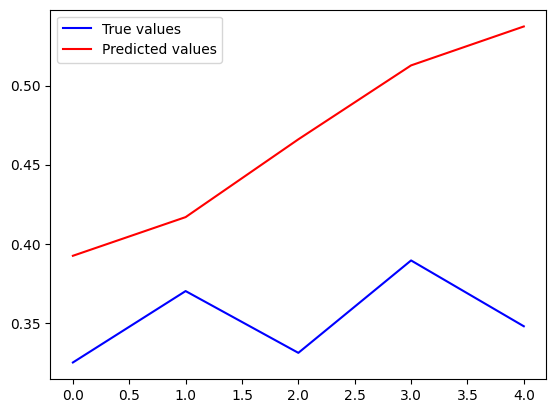

(32, 5)
(32, 5)
Predictions for 0: [0.6960102  0.6645655  0.6322675  0.6172847  0.60709304]
True values for 0: [0.7210153  0.82202846 0.74464273 0.7707843  0.8134289 ]


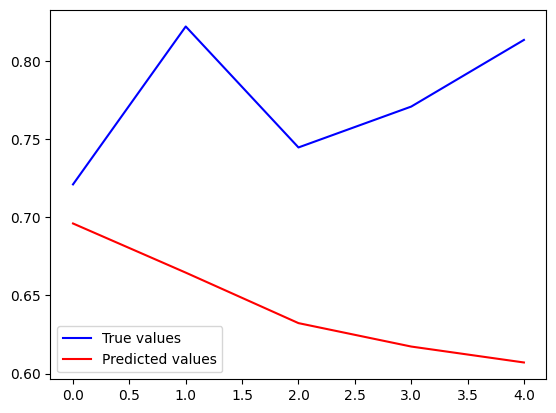

(32, 5)
(32, 5)
Predictions for 0: [0.6854265  0.6707512  0.6671782  0.6735393  0.67515427]
True values for 0: [0.5749371  0.6466045  0.6283286  0.62313914 0.8271067 ]


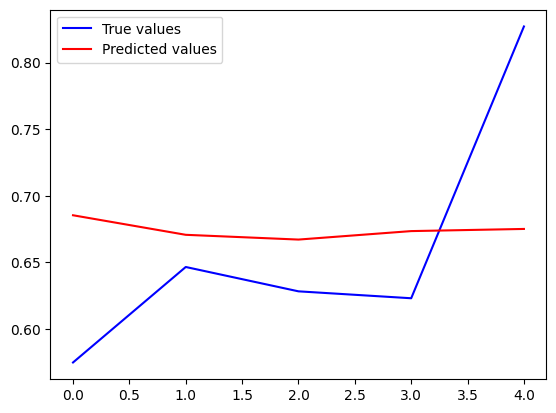

(32, 5)
(32, 5)
Predictions for 0: [0.5611752  0.50981086 0.4754432  0.4816318  0.50999427]
True values for 0: [0.3472361  0.2043054  0.23942019 0.1964737  0.26162368]


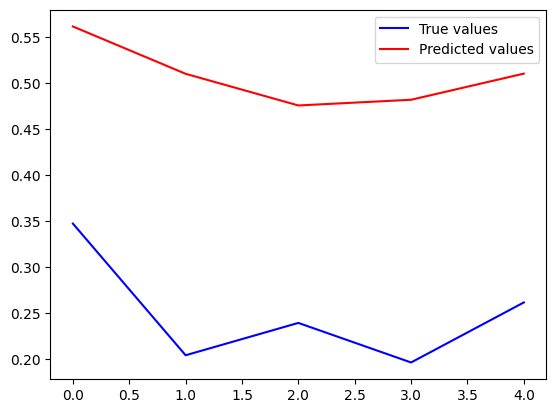

(32, 5)
(32, 5)
Predictions for 0: [0.7965576  0.7727203  0.7376183  0.71334517 0.68323904]
True values for 0: [0.65473074 0.59923756 0.56692165 0.48909467 0.569206  ]


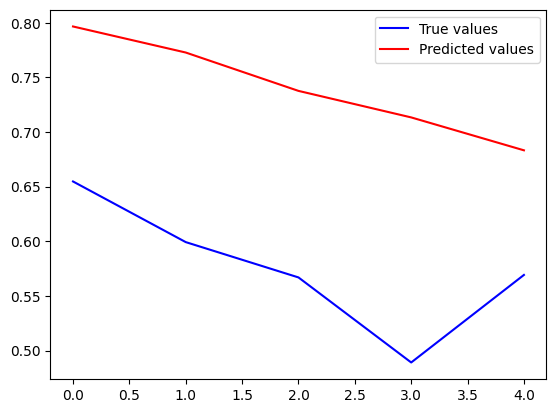

(32, 5)
(32, 5)
Predictions for 0: [0.49763682 0.47311512 0.49076977 0.5510004  0.6211674 ]
True values for 0: [0.21707514 0.24763617 0.34352735 0.30329555 0.3403626 ]


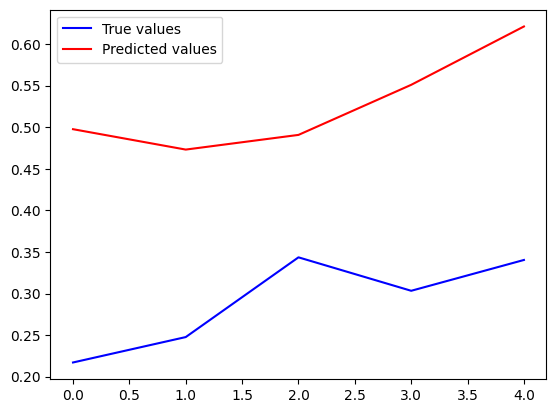

(32, 5)
(32, 5)
Predictions for 0: [0.7302704  0.7265782  0.73041695 0.73714936 0.7371123 ]
True values for 0: [0.5774648  0.6302173  0.70314884 0.5442498  0.39446574]


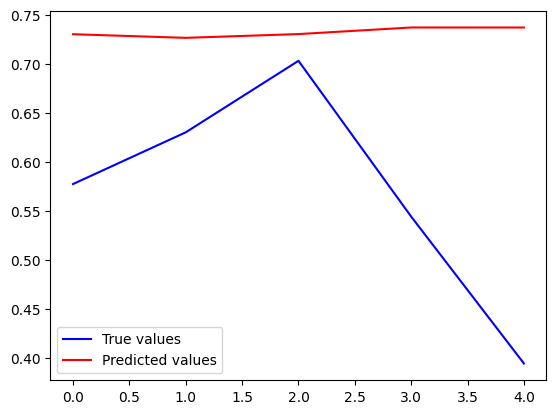

(32, 5)
(32, 5)
Predictions for 0: [0.7144767 0.6977688 0.6851442 0.6825737 0.676707 ]
True values for 0: [0.5144086  0.407524   0.35774422 0.31651592 0.32058072]


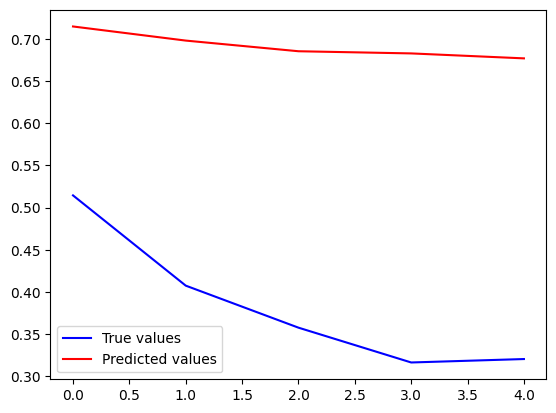

(32, 5)
(32, 5)
Predictions for 0: [0.71432203 0.70231354 0.6915649  0.6833639  0.6657182 ]
True values for 0: [0.33311272 0.3298018  0.32131153 0.38591453 0.21211615]


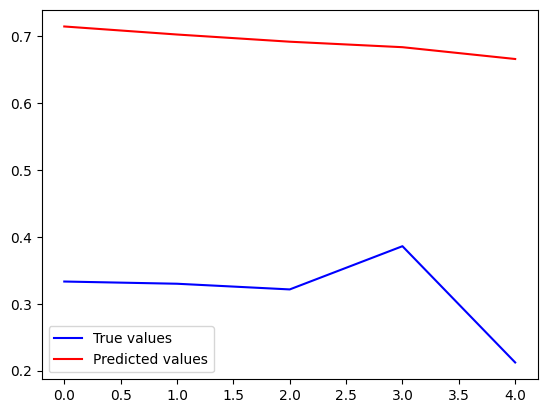

(32, 5)
(32, 5)
Predictions for 0: [0.42435917 0.44509724 0.51678675 0.6003096  0.6531262 ]
True values for 0: [0.30049458 0.36166477 0.38110638 0.39791512 0.4762825 ]


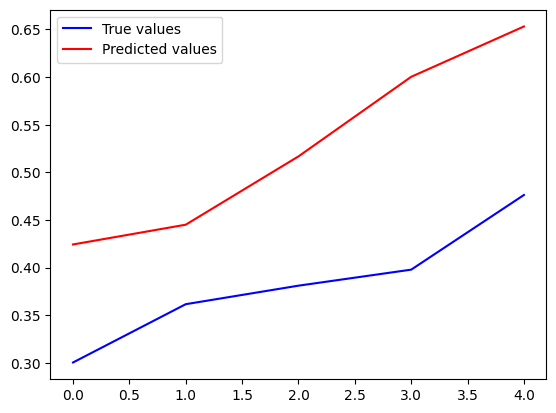

(32, 5)
(32, 5)
Predictions for 0: [0.6993535  0.6856346  0.6652063  0.64668334 0.619524  ]
True values for 0: [0.662078   0.61574686 0.661579   0.60826725 0.58599734]


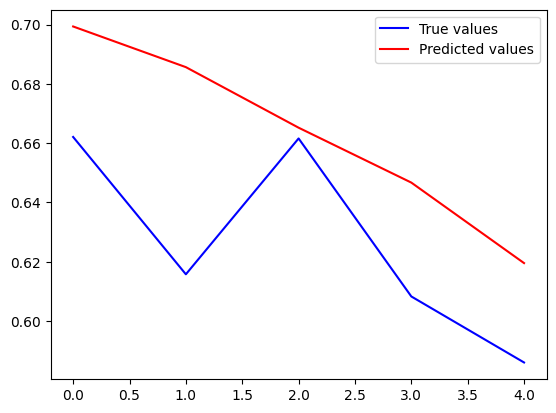

(32, 5)
(32, 5)
Predictions for 0: [0.7030322  0.7124104  0.73147005 0.7465744  0.74758476]
True values for 0: [0.5988336 0.5561242 0.5988329 0.6405402 0.5525254]


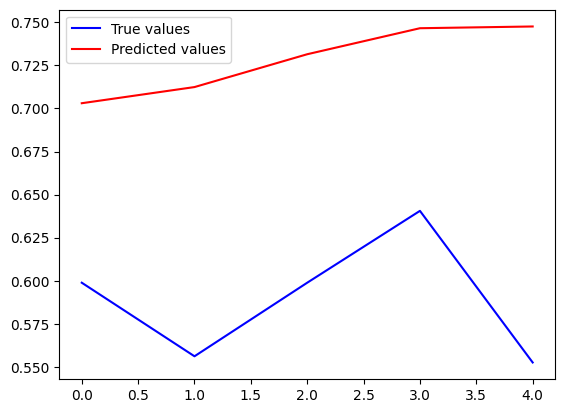

(32, 5)
(32, 5)
Predictions for 0: [0.42723408 0.43977773 0.43595266 0.40895793 0.3701552 ]
True values for 0: [0.29472563 0.36015025 0.3854297  0.37946004 0.27906296]


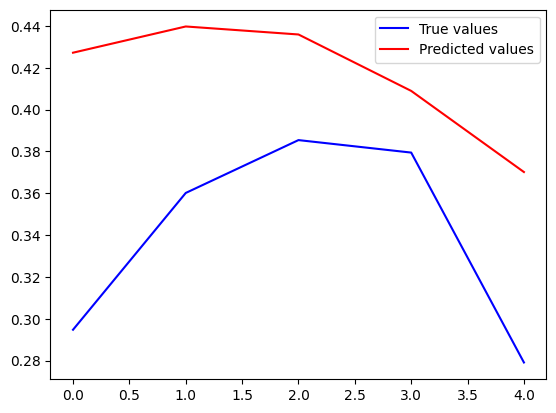

(10, 5)
(10, 5)
Predictions for 0: [0.5127961  0.5653514  0.61901444 0.6393023  0.6443687 ]
True values for 0: [0.29826108 0.2890734  0.2349239  0.216938   0.20072372]


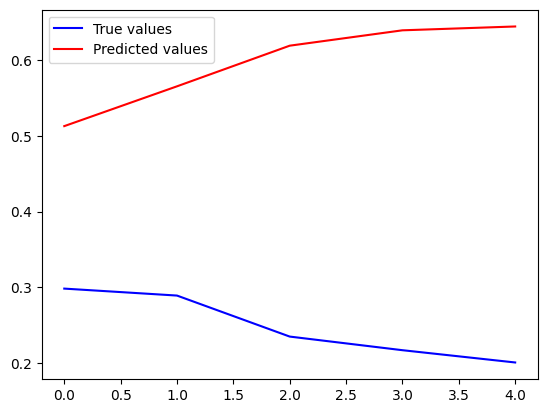

In [ ]:
model.eval()

test_loss = 0
num_batches = 0

with torch.no_grad():
    i = 0
    for ticker, loader in test_loaders.items():
        i += 1
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            y_pred = model(x_batch)
            
            loss = criterion(y_pred, y_batch)
            test_loss += loss.item()
            num_batches += 1
            
            if num_batches % 100 == 0:
                print(f"Test Loss after {num_batches} batches: {test_loss / num_batches}")
        
        if i == 2:
            break

avg_test_loss = test_loss / num_batches
print(f"Average Test Loss: {avg_test_loss}")

coordinates = np.linspace(start=0, stop=4, num=5, dtype=int).tolist()
print(coordinates)

ticker = 0 
j = 0
for x_batch, y_batch in test_loaders[ticker]:
    j += 1
    
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    
    y_pred = model(x_batch)
    
    # Detach from the computation graph and move to CPU for plotting
    y_pred = y_pred.detach().cpu().numpy()
    y_batch = y_batch.cpu().numpy()

    print(y_batch.shape)
    print(y_pred.shape)
    print(f"Predictions for {ticker}: {y_pred[0]}")
    print(f"True values for {ticker}: {y_batch[0]}")
    
    plt.plot(coordinates, y_batch[0], color="blue", label="True values")
    plt.plot(coordinates, y_pred[0], color="red", label="Predicted values")
    plt.legend()
    plt.show()

    if j == 20:
        break